In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_roc_curve, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Inceptez Batch 18/weight-height.csv")

In [39]:
data['Gender'] = data['Gender'].replace({'Male':0,'Female':1})

In [40]:
data.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [41]:
X = data.drop(columns=['Gender'])

In [42]:
X

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [43]:
y = data['Gender']

In [44]:
model = LogisticRegression()

In [45]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3)

In [46]:
model.fit(train_X,train_y)

LogisticRegression()

In [47]:
train_pred = model.predict(train_X)

In [48]:
test_pred = model.predict(test_X)

In [49]:
print(confusion_matrix(train_y, train_pred))

[[3242  277]
 [ 283 3198]]


In [50]:
print(accuracy_score(train_y, train_pred))

0.92


In [51]:
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3519
           1       0.92      0.92      0.92      3481

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



In [52]:
print(confusion_matrix(test_y, test_pred))

[[1365  116]
 [ 132 1387]]


In [53]:
print(accuracy_score(test_y, test_pred))

0.9173333333333333


In [54]:
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1481
           1       0.92      0.91      0.92      1519

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [55]:
data

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801
...,...,...,...
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461


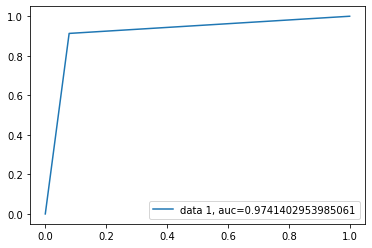

In [57]:
import matplotlib.pyplot as plt#
y_pred_proba = model.predict_proba(test_X)[::,1]
fpr, tpr, _ = roc_curve(test_y, test_pred )
auc = roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [71]:
import numpy as np
pred_5 = np.where(model.predict_proba(test_X)[:,1]>0.5,1,0)
pred_9 = np.where(model.predict_proba(test_X)[:,1]>0.9,1,0)
pred_2 = np.where(model.predict_proba(test_X)[:,1]>0.2,1,0)


In [65]:
accuracy_score(test_y, pred_5)

0.9173333333333333

In [66]:
accuracy_score(test_y, pred_9)

0.839

In [73]:
accuracy_score(test_y, pred_2)

0.8866666666666667